# 0. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


## 4.5. Câu hỏi 5
**Câu hỏi**: Mức tăng trưởng và doanh thu của các công ty theo số lượng nhân viên tại năm 2017 và năm thành lập

**Ý nghĩa**" Số lượng nhân viên xuất phát điểm tại năm 2017 là một yếu tố tác động đến mức độ tăng trưởng của công ty. Bên cạnh đó có thể kể đến năm thành lập. Để các nhà đầu tư có sự lựa chọn chính xác hơn trong việc đầu tư, ta sẽ phân tích sâu hơn về 2 yếu tố này

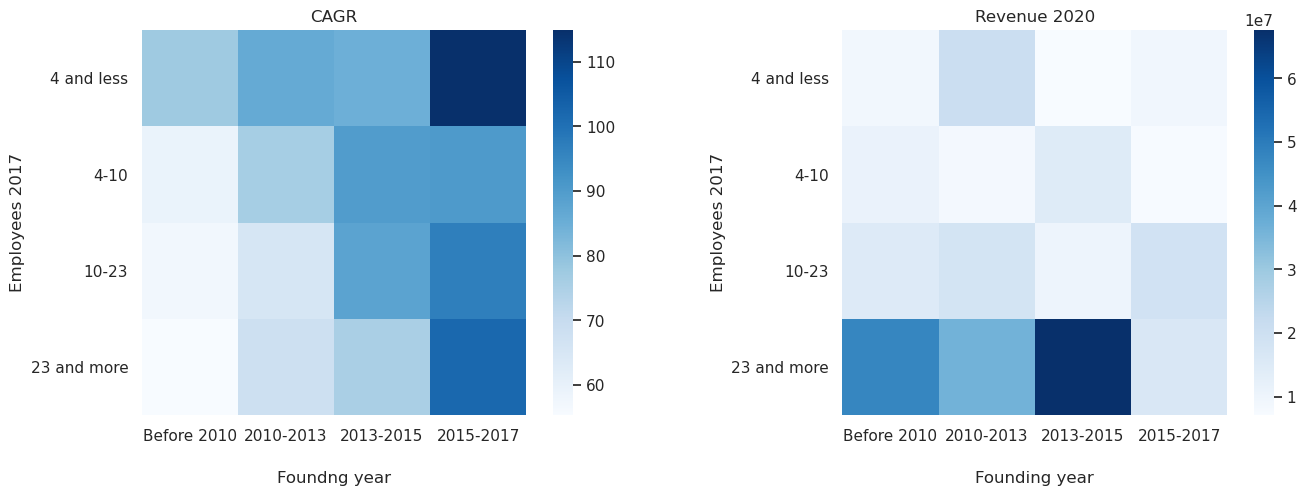

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
fig.subplots_adjust(wspace = 0.3)

data = df

data['emp'] = pd.qcut(
    data['Employees2017'],
    q = 4,
    labels = ['4 and less', '4-10', '10-23', '23 and more']
)

data['year'] = pd.qcut(
    data['FoundingYear'],
    q = 4,
    labels = ['Before 2010', '2010-2013', '2013-2015', '2015-2017']
)

data1 = data[['emp', 'year', 'CAGR']].groupby(['emp', 'year']).mean().reset_index()
data1 = pd.pivot(data1, index = 'emp', columns = 'year', values = 'CAGR')

data2 = data[['emp', 'year', 'Revenue2020']].groupby(['emp', 'year']).mean().reset_index()
data2 = pd.pivot(data2, index = 'emp', columns = 'year', values = 'Revenue2020')

sns.heatmap(data1, fmt = '.2f', cmap = 'Blues', ax = axes[0])
sns.heatmap(data2, fmt = '.2f', cmap = 'Blues', ax = axes[1])

axes[0].set_ylabel('Employees 2017')
axes[1].set_ylabel('Employees 2017')
axes[0].set_xlabel('Foundng year', labelpad=20)
axes[1].set_xlabel('Founding year', labelpad=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation = 0)

axes[0].set_title('CAGR')
axes[1].set_title('Revenue 2020')

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

Về CAGR, những công ty có càng ít nhân viên vào năm 2017 và càng thành lập về gần đây (có thể xem đây như nhóm công ty nhỏ, start-up) có mức độ tăng trưởng trung bình cao hơn, lên đến khoảng 100%/năm

Về doanh thu năm 2020, công ty càng nhiều nhân viên thì doanh thu năm 2020 càng cao, tuy nhiên nhóm có doanh thu cao nhất lại tập trung ở nhóm thành lập từ 2013 tới 2015. Có thể đây là do một outlier nào đó thuộc nhóm này, ta cần xử lí outlier này trước

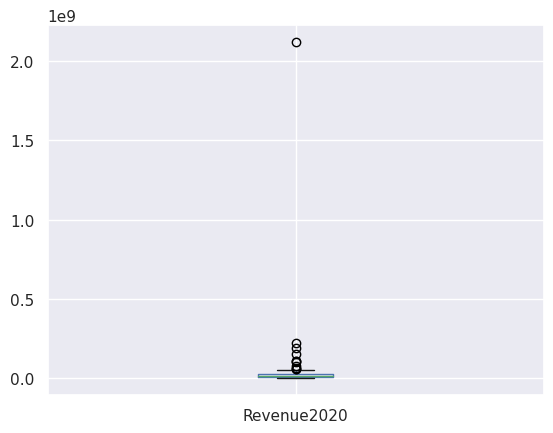

In [ ]:
ax = df[(df['Employees2017'] >= 23) & (df['FoundingYear'] >= 2013)]['Revenue2020'].plot(kind = 'box')

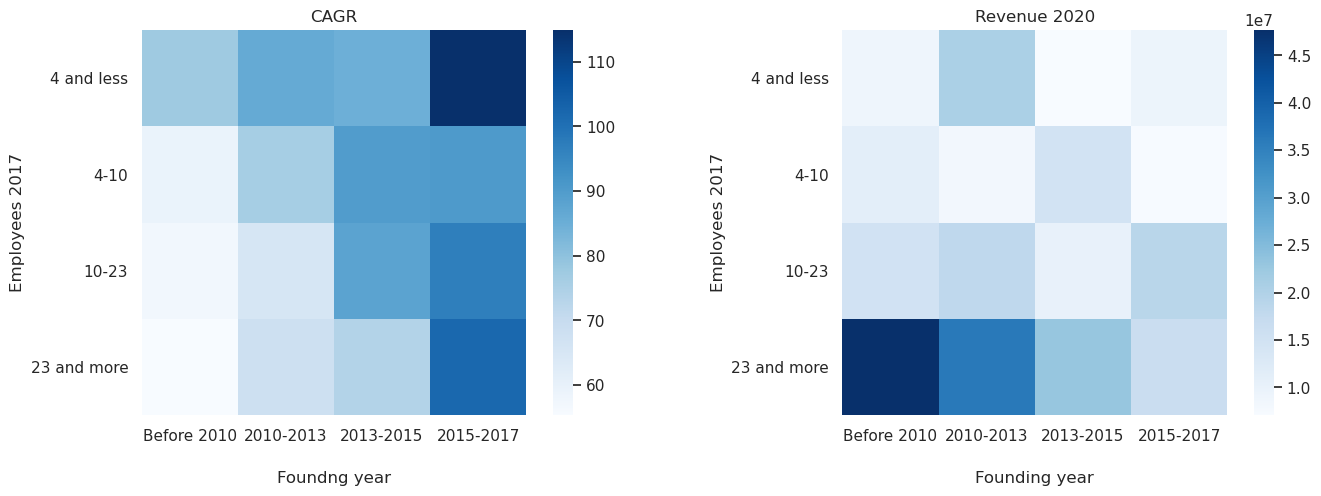

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
fig.subplots_adjust(wspace = 0.3)

data = df[df['Revenue2020'] < 2000000000]

data['emp'] = pd.qcut(
    data['Employees2017'],
    q = 4,
    labels = ['4 and less', '4-10', '10-23', '23 and more']
)

data['year'] = pd.qcut(
    data['FoundingYear'],
    q = 4,
    labels = ['Before 2010', '2010-2013', '2013-2015', '2015-2017']
)

data1 = data[['emp', 'year', 'CAGR']].groupby(['emp', 'year']).mean().reset_index()
data1 = pd.pivot(data1, index = 'emp', columns = 'year', values = 'CAGR')

data2 = data[['emp', 'year', 'Revenue2020']].groupby(['emp', 'year']).mean().reset_index()
data2 = pd.pivot(data2, index = 'emp', columns = 'year', values = 'Revenue2020')

sns.heatmap(data1, fmt = '.2f', cmap = 'Blues', ax = axes[0])
sns.heatmap(data2, fmt = '.2f', cmap = 'Blues', ax = axes[1])

axes[0].set_ylabel('Employees 2017')
axes[1].set_ylabel('Employees 2017')
axes[0].set_xlabel('Foundng year', labelpad=20)
axes[1].set_xlabel('Founding year', labelpad=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation = 0)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation = 0)

axes[0].set_title('CAGR')
axes[1].set_title('Revenue 2020')

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

Ở đây ta có thể dễ dàng nhận thấy các công ty càng nhiều nhân viên ở năm 2017 và càng thành lập ở những năm về trước thì càng có doanh thu cao. 
Do đó nếu nhà đầu tư muốn đầu tư ổn định nhưng tốc độ sinh lãi thấp có thể chọn các công ty đông nhân viên và thành lập sớm. Còn nếu các nhà đầu tư muốn đầu tư sinh lãi nhanh có thể chọn các công ty thành lập gần đây (và ít nhân viên), tuy nhiên có thể có những rủi ro về việc kinh doanh vì các công ty này hoạt động chưa lâu